In [2]:
import numpy as np 
import pandas as pd 
import statistics as stats 
import matplotlib.pyplot as plt 
import seaborn as sb

In [3]:
df = pd.read_csv("./auto_mpg.csv")
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
258,20.6,6,231.0,105,3380,15.8,78,1,buick century special
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
273,23.9,4,119.0,97,2405,14.9,78,3,datsun 200-sx
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504
85,13.0,8,350.0,175,4100,13.0,73,1,buick century 350
162,15.0,6,258.0,110,3730,19.0,75,1,amc matador
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
250,19.4,8,318.0,140,3735,13.2,78,1,dodge diplomat
71,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe


In [4]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [5]:
df.describe(include='all')

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [6]:

df1 = df[df.hp != '?']
df1 = df1.astype({'hp': float})
meanhp = np.mean(df1.hp)
print(meanhp)      
mask = (df['hp']=='?')
df.loc[mask, 'hp'] = meanhp
df = df.astype({'hp':float})
meanhp = np.mean(df.hp)
print(meanhp)

104.46938775510205
104.46938775510203


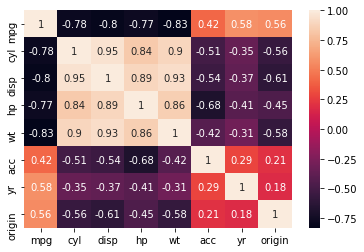

In [7]:
sb.heatmap(df.corr(), annot = True);

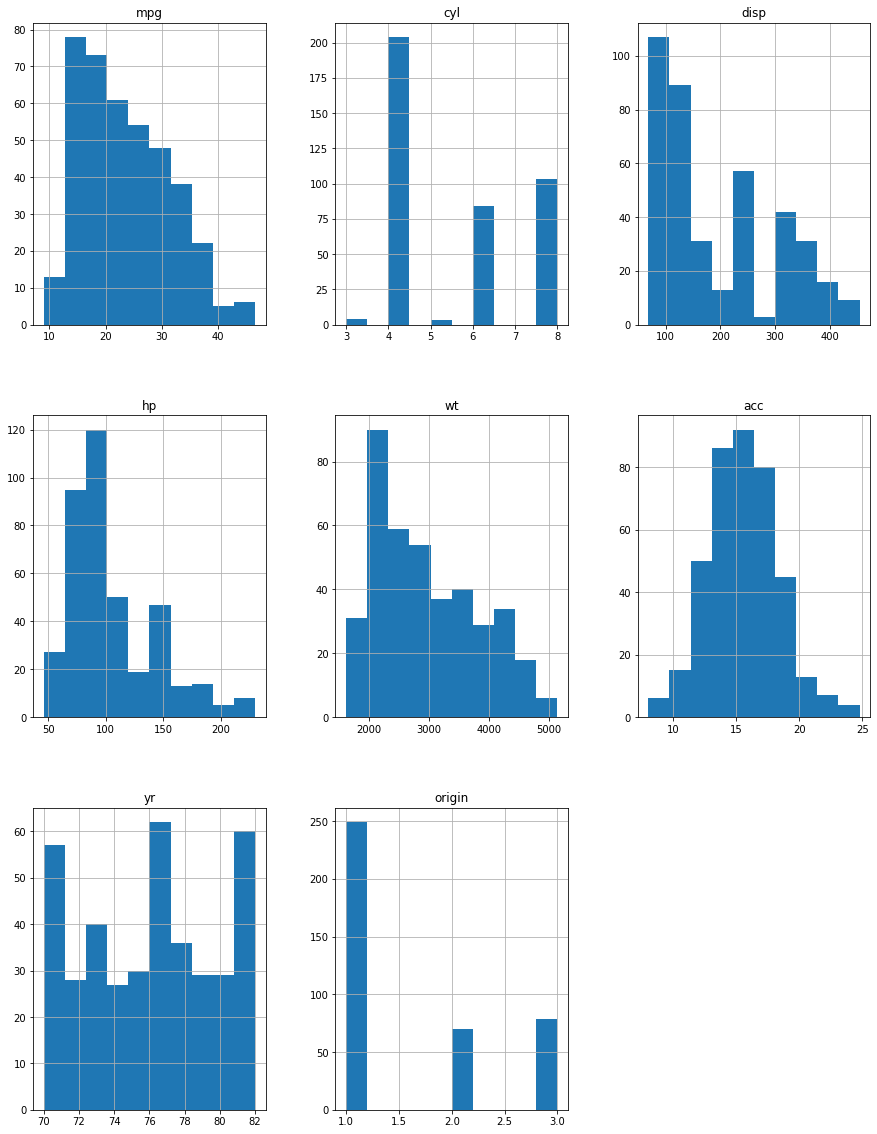

In [8]:
df.hist(figsize= (15,20));

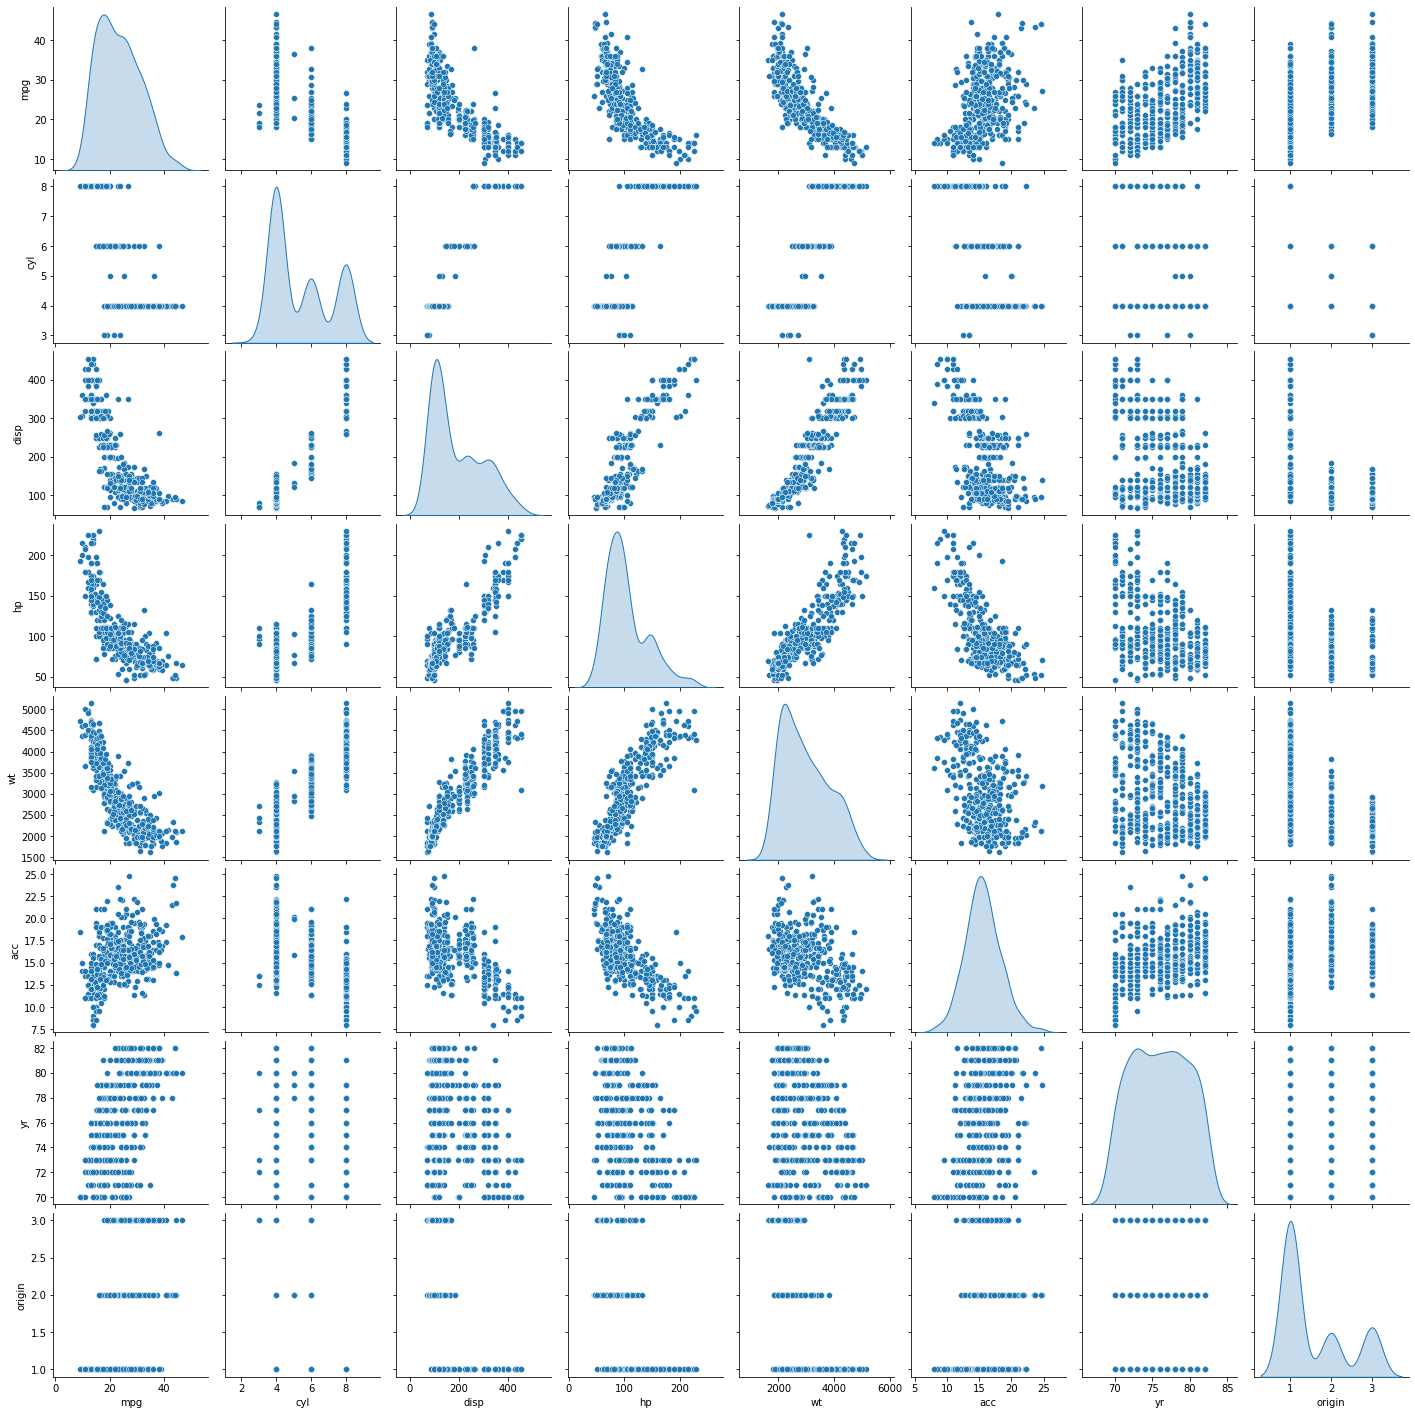

In [9]:
sb.pairplot(df, diag_kind = 'kde');

In [10]:
try:
    df = df.drop('car name', axis= 1)
except:
    df.head()

In [11]:
df.origin = df['origin'].replace({1:'America', 2: 'europe', 3:'Asia'})

In [12]:
df = pd.get_dummies(df, columns= ['origin'])

In [13]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('mpg', axis = 1)
Y = df.mpg
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,test_size=0.15, random_state=1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(338, 9)
(60, 9)
(338,)
(60,)


In [31]:
# Model Build
reg = LinearRegression()
reg.fit(X_TRAIN, Y_TRAIN)

# Predicted data training
y_train_pred = reg.predict(X_TRAIN)
rmse_Train = np.sqrt(mean_squared_error(Y_TRAIN, y_train_pred))

#Predicted data testing
y_test_pred = reg.predict(X_TEST)
rmse_Test = np.sqrt(mean_squared_error(Y_TEST, y_test_pred))

print("TRAIN ERROR: ", rmse_Train, "\n", "TEST ERROR: ", rmse_Test)

TRAIN ERROR:  3.4050985625362866 
 TEST ERROR:  2.452947070945411


In [32]:
print("TRAIN SCORE: ",reg.score(X_TRAIN, Y_TRAIN), "\n", "TEST SCORE: ", reg.score(X_TEST,Y_TEST))

TRAIN SCORE:  0.8141579567621088 
 TEST SCORE:  0.8854892237877148
